In [1]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import time

In [3]:
""" 
The idea is to set a small integer S as a threshold for the size of subarrays.
Once the size of a subarray in a recursive call of Mergesort is less than or equal to S,
the algorithm will switch to Insertion Sort, which is efficient for small-sized input
"""

class HybridSort:
    def __init__(self, arr = []):
        self.arr = arr
        self.comparisons = 0
        
    def resetComparisons(self):
        self.comparisons = 0 # to reset key comparison value once array is sorted

    def insertionSort(self, arr):
        if len(arr) < 2:
            return arr

        i = 1
        while i < len(arr):
           #self.comparisons += 1
            if arr[i] < arr[i-1]:
                j = i-1
                while j > 0:
                    self.comparisons += 1
                    if arr[i] > arr[j-1]:
                        break
                    j -= 1
                shiftElement = arr[i] #copy element
                arr[j+1:i+1] = arr[j:i]
                arr[j] = shiftElement
            i += 1
        return self.comparisons 


    def mergeSort(self, arr):
        if len(arr) < 2:
            return arr
        elif len(arr) == 2:
            if arr[0] > arr[1]:
                temp = arr[0]
                arr[0] = arr[1]
                arr[1] = temp #do a swap of 2 elements if they are descending order
            
        mid = len(arr)//2 #get integer value of middle index
        left = arr[:mid] #left subarray will be first half of array
        self.mergeSort(left)

        right = arr[mid:] #right subarray will be second half of array
        self.mergeSort(right)
        
        self.mergeArrays(arr, left, right) 
        
        return self.comparisons

    def mergeArrays(self, arr, L, R):
        indexL = indexR = newindex = 0

        while indexL < len(L) and indexR < len(R):
            if L[indexL] < R[indexR]:
                arr[newindex] = L[indexL] 
                indexL += 1 
            else:
                arr[newindex] = R[indexR]
                indexR += 1
            newindex += 1
            self.comparisons += 1 
  
        # Append leftover elements from either array after either array is empty
        while indexL < len(L):
            arr[newindex] = L[indexL]
            indexL += 1
            newindex += 1
  
        while indexR < len(R):
            arr[newindex] = R[indexR]
            indexR += 1
            newindex += 1

    def hybridSort(self, arr):
        s = 20 #variable
        if len(arr) > 1:
            
            if len(arr) <= s:
                self.insertionSort(arr)
            
            mid = len(arr)//2 #get integer value of middle index
            left = arr[:mid] #left subarray will be first half of array
            self.hybridSort(left)

            right = arr[mid:] #right subarray will be second half of array
            self.hybridSort(right)

            self.mergeArrays(arr, left, right) 
            return self.comparisons

Now, we call a function to generate data of increasing arrays.


In [4]:
def generateData(minsize, maxsize):
    minlimit = 1
    maxlimit = 1000
    
    step = (maxsize - minsize)//12

    
    cursize = minsize
    datasets = {}
    
    while cursize <= maxsize:
        dataset = []
        for x in range (0, cursize):
            dataset.append(random.randint(minlimit, maxlimit))
            datasets[cursize] = dataset #set the key value as array size, item value as array
        cursize += step
        
    if cursize > maxsize:
        datasetMax = []
        for x in range (0, maxsize):
            datasetMax.append(random.randint(minlimit, maxlimit))
            datasets[maxsize] = datasetMax
    '''  
    for size, dataset in datasets.items():
        print(f"Size: {size}, Length: {len(dataset)}") #print key values and length of arrays
    '''      
    
    return datasets

In [5]:
dataset1 = generateData(1000, 10000000)
dataset2 = generateData(10000, 10000000)

Testing each dataset for Hybrid Sort (Key Comparisons and CPU Time)

In [14]:
comparison_counts = []
dataset_sizes = []

# testing dataset 1000 to 10000000
for size, dataset in dataset1.items():
    sorting_algorithm = HybridSort(list(dataset)) 
    start_time = time.time()  # start timer
    comparisons = sorting_algorithm.hybridSort(sorting_algorithm.arr)
    end_time = time.time()  # end timer
    execution_time = end_time - start_time  # find execution time
    sorted_array = sorting_algorithm.arr

    # append  number of comparisons and dataset size to the lists
    comparison_counts.append(comparisons)
    dataset_sizes.append(len(dataset))

    # verify if sorting is done and print results
    is_sorted = all(sorted_array[i] <= sorted_array[i + 1] for i in range(len(sorted_array) - 1))
    print(f"Dataset Size: {len(dataset)}")
    print(f"Sorting Time: {execution_time} seconds")
    print(f"Is Sorted: {is_sorted}")
    print(f"Number of Comparisons: {comparisons}\n")

Dataset Size: 1000
Sorting Time: 0.005349159240722656 seconds
Is Sorted: True
Number of Comparisons: 11328

Dataset Size: 834250
Sorting Time: 6.018641233444214 seconds
Is Sorted: True
Number of Comparisons: 16938856

Dataset Size: 1667500
Sorting Time: 12.679514169692993 seconds
Is Sorted: True
Number of Comparisons: 35518645

Dataset Size: 2500750
Sorting Time: 20.47474718093872 seconds
Is Sorted: True
Number of Comparisons: 58118412

Dataset Size: 3334000
Sorting Time: 26.063560962677002 seconds
Is Sorted: True
Number of Comparisons: 74353343

Dataset Size: 4167250
Sorting Time: 33.381756067276 seconds
Is Sorted: True
Number of Comparisons: 97692269

Dataset Size: 5000500
Sorting Time: 43.17306900024414 seconds
Is Sorted: True
Number of Comparisons: 121206945

Dataset Size: 5833750
Sorting Time: 48.46586585044861 seconds
Is Sorted: True
Number of Comparisons: 132680827

Dataset Size: 6667000
Sorting Time: 55.21095395088196 seconds
Is Sorted: True
Number of Comparisons: 155335096

Da

Showing it as a graph to visualize it better

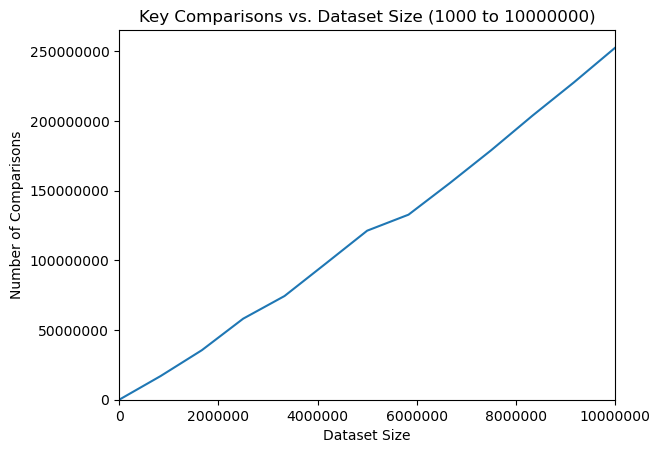

In [15]:
plt.title("Key Comparisons vs. Dataset Size (1000 to 10000000)")
plt.xlabel("Dataset Size")
plt.ylabel("Number of Comparisons")
plt.ticklabel_format(style = 'plain')
plt.plot(dataset_sizes, comparison_counts)  
plt.xlim([0,10000000])
plt.ylim(bottom = 0)
plt.show()







In [12]:
comparison_counts = []
dataset_sizes = []


# testing dataset 100000 to 10000000
for size, dataset in dataset2.items():
    sorting_algorithm = HybridSort(list(dataset)) 
    start_time = time.time()  # start timer
    comparisons = sorting_algorithm.hybridSort(sorting_algorithm.arr)
    end_time = time.time()  # end timer
    execution_time = end_time - start_time  # find execution time
    sorted_array = sorting_algorithm.arr

    # append  number of comparisons and dataset size to the lists
    comparison_counts.append(comparisons)
    dataset_sizes.append(len(dataset))

    # verify if sorting is done and print results
    is_sorted = all(sorted_array[i] <= sorted_array[i + 1] for i in range(len(sorted_array) - 1))
    print(f"Dataset Size: {len(dataset)}")
    print(f"Sorting Time: {execution_time} seconds")
    print(f"Is Sorted: {is_sorted}")
    print(f"Number of Comparisons: {comparisons}")

Dataset Size: 10000
Sorting Time: 0.05736589431762695 seconds
Is Sorted: True
Number of Comparisons: 153734
Dataset Size: 842500
Sorting Time: 6.057326078414917 seconds
Is Sorted: True
Number of Comparisons: 17138357
Dataset Size: 1675000
Sorting Time: 12.709778070449829 seconds
Is Sorted: True
Number of Comparisons: 35705860
Dataset Size: 2507500
Sorting Time: 20.28979206085205 seconds
Is Sorted: True
Number of Comparisons: 58324184
Dataset Size: 3340000
Sorting Time: 25.99532127380371 seconds
Is Sorted: True
Number of Comparisons: 74506894
Dataset Size: 4172500
Sorting Time: 34.111496925354004 seconds
Is Sorted: True
Number of Comparisons: 97845695
Dataset Size: 5005000
Sorting Time: 41.519964933395386 seconds
Is Sorted: True
Number of Comparisons: 121336182
Dataset Size: 5837500
Sorting Time: 46.597240924835205 seconds
Is Sorted: True
Number of Comparisons: 132780475
Dataset Size: 6670000
Sorting Time: 54.64056706428528 seconds
Is Sorted: True
Number of Comparisons: 155418558
Datase

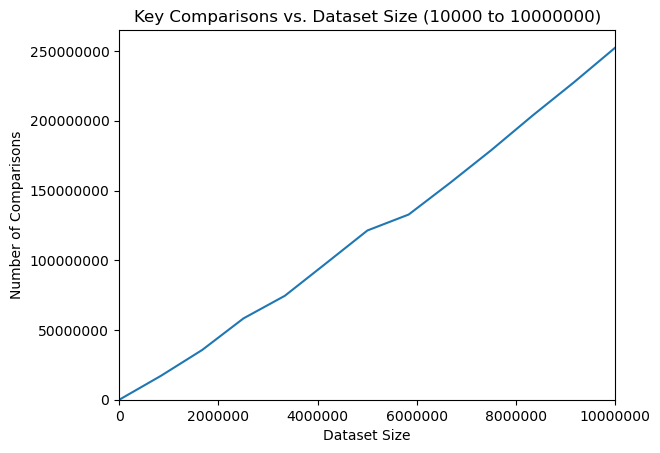

In [13]:
plt.title("Key Comparisons vs. Dataset Size (10000 to 10000000)")
plt.xlabel("Dataset Size")
plt.ylabel("Number of Comparisons")
plt.ticklabel_format(style = 'plain')
plt.plot(dataset_sizes, comparison_counts)  
plt.xlim([0,10000000])
plt.ylim(bottom = 0)
plt.show()





